# Sprint 11 - Proyecto

# Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

# Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

# Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

# Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

# Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

# Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.

# Importar librerias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy import stats

# Paso 1. Abrir el archivo de datos y leer la información general

In [22]:
df_logs = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
print(df_logs.head(10))

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
5         CartScreenAppear  6217807653094995999      1564055323    248
6       OffersScreenAppear  8351860793733343758      1564066242    246
7         MainScreenAppear  5682100281902512875      1564085677    246
8         MainScreenAppear  1850981295691852772      1564086702    247
9         MainScreenAppear  5407636962369102641      1564112112    246


In [23]:
df_logs.info()
df_logs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


# Paso 2. Preparar los datos para el análisis

In [24]:
df_logs.columns = ['event_name', 'user_id', 'timestamp', 'exp_id']

df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], unit='s')

df_logs['date'] = df_logs['timestamp'].dt.date

print(df_logs.head())

                event_name              user_id           timestamp  exp_id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   

         date  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


# Paso 3. Estudiar y comprobar los datos

# ¿Cuántos eventos hay en los registros?

In [25]:
num_events = len(df_logs)
print(f"Número total de eventos en los registros: {num_events}")

Número total de eventos en los registros: 244126


# ¿Cuántos usuarios hay en los registros?

In [26]:
num_users = df_logs['user_id'].nunique()
print(f"Número total de usuarios en los registros: {num_users}")

Número total de usuarios en los registros: 7551


# ¿Cuál es el promedio de eventos por usuario?

In [27]:
avg_events_per_user = num_events / num_users
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

Promedio de eventos por usuario: 32.33


# ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17
Período de tiempo cubierto 2019-07-25 al 2019-08-07


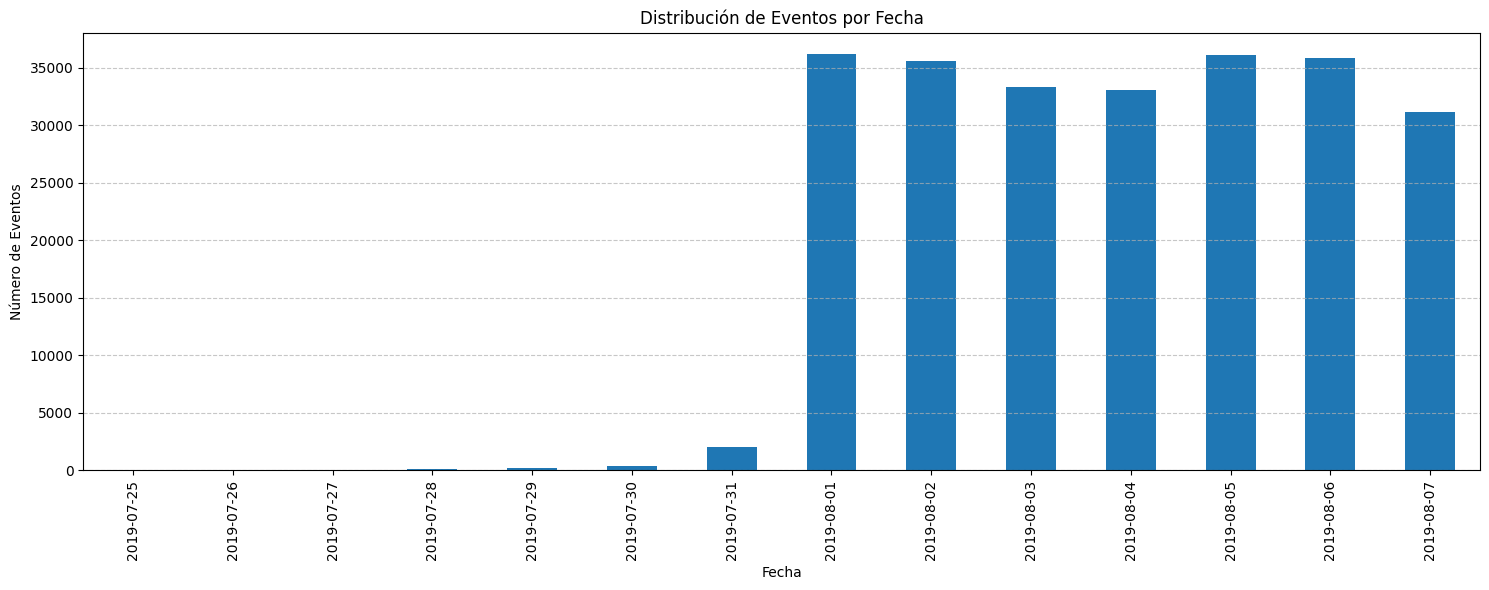

In [28]:
min_date = df_logs['timestamp'].min()
max_date = df_logs['timestamp'].max()

print(f"Fecha mínima: {min_date}")
print(f"Fecha máxima: {max_date}")
print(f"Período de tiempo cubierto {min_date.date()} al {max_date.date()}")

plt.figure(figsize=(15, 6))
df_logs['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Eventos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Mi decision determina que existe una meseta de datos altos y consistentes a partir de 2019-08-01, esa seria la fecha en la que los datos empiezan a estar completos e ignoraria lo anterior!
</div>


Número de eventos antes del filtrado: 244126
Número de eventos después del filtrado (a partir de 2019-08-01): 241298

El período de tiempo real de los datos (completos) es del 2019-08-01 al 2019-08-07


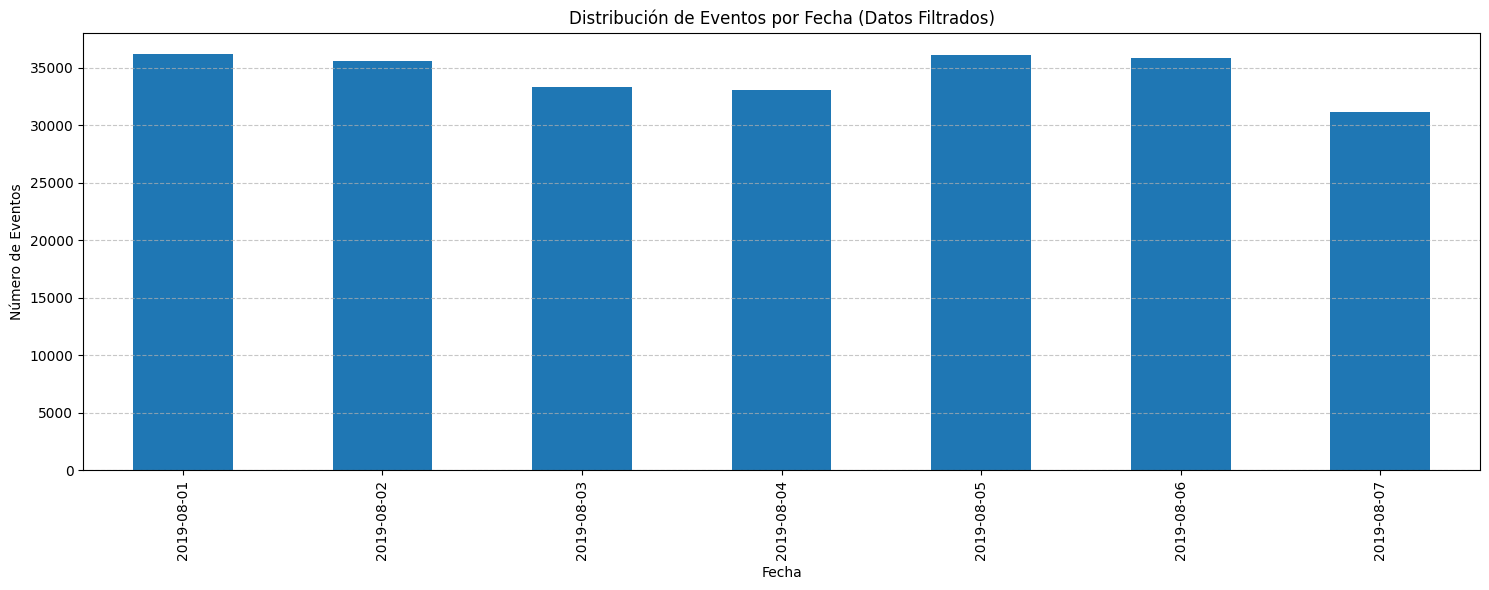

In [29]:
start_date_complete = pd.to_datetime('2019-08-01').date()

df_logs_filtered = df_logs[df_logs['date'] >= start_date_complete].copy()

print(f"\nNúmero de eventos antes del filtrado: {len(df_logs)}")
print(f"Número de eventos después del filtrado (a partir de {start_date_complete}): {len(df_logs_filtered)}")

new_min_date = df_logs_filtered['timestamp'].min()
new_max_date = df_logs_filtered['timestamp'].max()

print(f"\nEl período de tiempo real de los datos (completos) es del {new_min_date.date()} al {new_max_date.date()}")

plt.figure(figsize=(15, 6))
df_logs_filtered['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Eventos por Fecha (Datos Filtrados)')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Se redujeron 2828 eventos correspondientes al periodo incompleto de Julio, es decir pasamos de 244126 a 241298, es una cantidad pequeña de datos perdidos un 1.16% realmente, lo cual es excelente porque no afecta significativamente el volumen total del análisis, sumado a esto, ratifico el período de tiempo real para el análisis que es ahora del 2019-08-01 al 2019-08-07, un rango de fechas donde se tiene datos consistentes y completos, lo demuestra el histograma, pues las barras tienen una altura similar, indicando un volumen de eventos diarios uniformes y sin saltos repentinos de datos faltantes, esencial para un buen análisis de tendencias, tasas de conversión o resultados de experimentos, si no se hiciera se podrian sesgar y la idea es tener una base de datos limpia y representativa para el período de estudio!
</div>

# ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [30]:
num_users_original = df_logs['user_id'].nunique()

num_users_filtered = df_logs_filtered['user_id'].nunique()

users_lost = num_users_original - num_users_filtered

print(f"\nNúmero de usuarios datos originales: {num_users_original}")
print(f"Número de usuarios datos filtrados (a partir de 2019-08-01): {num_users_filtered}")
print(f"Número de usuarios perdidos excluyendo datos más antiguos: {users_lost}")

percentage_users_lost = (users_lost / num_users_original) * 100
print(f"Porcentaje de usuarios perdidos: {percentage_users_lost:.2f}%")


Número de usuarios datos originales: 7551
Número de usuarios datos filtrados (a partir de 2019-08-01): 7534
Número de usuarios perdidos excluyendo datos más antiguos: 17
Porcentaje de usuarios perdidos: 0.23%


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Solo se perdieron 2828 eventos y 17 usuarios de un total de 7551 originales, representando solo un insignificante 0.23% del total, es un número realmente bajo y poco significativo, perder menos del 1% de usuarios al filtrar datos incompletos es un costo mínimo por la ganancia de tener datos mucho más confiables y representativos, referentes al comportamiento habitual de los usuarios.
</div>

# Asegúrate de tener usuarios de los tres grupos experimentales.

In [31]:
users_per_group = df_logs_filtered.groupby('exp_id')['user_id'].nunique()

print("\nNúmero de usuarios únicos por grupo experimental (datos filtrados):")
print(users_per_group)

events_per_group = df_logs_filtered['exp_id'].value_counts().sort_index()
print("\nNúmero de eventos por grupo experimental (datos filtrados):")
print(events_per_group)


Número de usuarios únicos por grupo experimental (datos filtrados):
exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Número de eventos por grupo experimental (datos filtrados):
246    79425
247    77147
248    84726
Name: exp_id, dtype: int64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
La distribucion de los usuarios y de los eventos en los tres grupos es bastante similar, tienen numeros bastante parecidos, algo ideal para un test A/A/B, las pequeñas variaciones parecen normales, se ve como una buena señal, mostrando que la división de grupos fue efectiva!
</div>

# Paso 4. Estudiar el embudo de eventos

# Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [32]:
event_frequency = df_logs_filtered['event_name'].value_counts()

print("\nFrecuencia de cada evento (ordenado por los más frecuentes):")
print(event_frequency)


Frecuencia de cada evento (ordenado por los más frecuentes):
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


# Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [33]:
users_per_event = df_logs_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

print("\nNúmero de usuarios únicos por evento (los más populares):")
print(users_per_event)

total_unique_users = df_logs_filtered['user_id'].nunique()
proportion_users_per_event = (users_per_event / total_unique_users) * 100

print(f"\nNúmero total de usuarios únicos en el período filtrado: {total_unique_users}")
print("\nProporción de usuarios únicos que realizaron cada acción (los más populares):")
print(proportion_users_per_event.round(2))


Número de usuarios únicos por evento (los más populares):
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

Número total de usuarios únicos en el período filtrado: 7534

Proporción de usuarios únicos que realizaron cada acción (los más populares):
event_name
MainScreenAppear           98.47
OffersScreenAppear         60.96
CartScreenAppear           49.56
PaymentScreenSuccessful    46.97
Tutorial                   11.15
Name: user_id, dtype: float64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
MainScreenAppear el 98.47% de los usuarios, confirma que casi todos los usuarios filtrados, llegaron a la pantalla principal, validando que la entrada al embudo es robusta y que la gran mayoría de los usuarios interactúan con la aplicación desde el inicio; En OffersScreenAppear con el 60.96% de los usuarios, existe una caída significativa de usuarios después de la pantalla principal, solo el 61% de los usuarios que vieron la pantalla principal, también vieron la pantalla de ofertas; En CartScreenAppear el 49.56% de los usuarios, menos de la mitad de los usuarios que vieron la pantalla principal, llegaron a ver la pantalla del carrito, algo crucial ya que el carrito es un paso previo al pago, asi entonces en paymentScreenSuccessful un 46.97% de los usuarios, sorprende, la caída de la pantalla del carrito a la pantalla de pago exitoso es relativamente baja, podria sugerir que los usuarios que llegan al carrito están bastante decididos a comprar; En tutorial con un 11.15% de los usuarios muy bajo reafirmaria la probabilidad de que no forman parte de la secuencia principal del embudo de ventas.
</div>

# ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
1. MainScreenAppear: El usuario abre la app y ve la pantalla principal.
2. OffersScreenAppear: Desde la pantalla principal, el usuario navega a ver las ofertas.
3. CartScreenAppear: Desde ofertas o directamente, el usuario añade al carrito y ve la pantalla del carrito.
4. PaymentScreenSuccessful: El usuario procede al pago y lo completa satisfactoriamente.
El evento Tutorial no encaja directamente en esta secuencia de compra principal, puede ser visto en cualquier momento o simplemente ignorado por la mayoría.
</div>

# Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [34]:
funnel_steps = ['MainScreenAppear',
                'OffersScreenAppear',
                'CartScreenAppear',
                'PaymentScreenSuccessful']

funnel_df = pd.DataFrame(columns=['event_name', 'unique_users', 'percentage_of_total_users', 'conversion_to_next_step'])

total_users_in_dataset = df_logs_filtered['user_id'].nunique()

users_in_each_step = []

for i, step in enumerate(funnel_steps):
    current_step_users = df_logs_filtered[df_logs_filtered['event_name'] == step]['user_id'].nunique()
    
    percentage_of_total = (current_step_users / total_users_in_dataset) * 100
    
    conversion_to_next = None
    if i == 0: 
        pass 
    else:
        previous_step_users_count = funnel_df.loc[i-1, 'unique_users']
        if previous_step_users_count > 0:
            conversion_to_next = (current_step_users / previous_step_users_count) * 100
            
    funnel_df.loc[i] = [step, current_step_users, percentage_of_total, conversion_to_next]

funnel_df['conversion_to_next_step'] = funnel_df['unique_users'].pct_change() * 100
funnel_df.loc[0, 'conversion_to_next_step'] = np.nan 

funnel_results = []
for i, step in enumerate(funnel_steps):
    current_users = df_logs_filtered[df_logs_filtered['event_name'] == step]['user_id'].nunique()
    
    if i == 0:
        conversion_from_previous = 100.0 
        total_conversion_from_start = (current_users / total_users_in_dataset) * 100
    else:
        previous_users = df_logs_filtered[df_logs_filtered['event_name'] == funnel_steps[i-1]]['user_id'].nunique()
        conversion_from_previous = (current_users / previous_users) * 100 if previous_users > 0 else 0
        total_conversion_from_start = (current_users / df_logs_filtered[df_logs_filtered['event_name'] == funnel_steps[0]]['user_id'].nunique()) * 100

    funnel_results.append({
        'Etapa': step,
        'Usuarios Únicos': current_users,
        'Porcentaje del Total de Usuarios': (current_users / total_users_in_dataset) * 100,
        'Tasa de Conversión (respecto a etapa anterior)': conversion_from_previous,
        'Tasa de Conversión (respecto a MainScreenAppear)': total_conversion_from_start
    })

funnel_summary_df = pd.DataFrame(funnel_results)

print("\n--- Consolidado del Embudo de Eventos (Usuarios Únicos) ---")
print(funnel_summary_df.round(2))


--- Consolidado del Embudo de Eventos (Usuarios Únicos) ---
                     Etapa  Usuarios Únicos  Porcentaje del Total de Usuarios  \
0         MainScreenAppear             7419                             98.47   
1       OffersScreenAppear             4593                             60.96   
2         CartScreenAppear             3734                             49.56   
3  PaymentScreenSuccessful             3539                             46.97   

   Tasa de Conversión (respecto a etapa anterior)  \
0                                          100.00   
1                                           61.91   
2                                           81.30   
3                                           94.78   

   Tasa de Conversión (respecto a MainScreenAppear)  
0                                             98.47  
1                                             61.91  
2                                             50.33  
3                                             47.70

# ¿En qué etapa pierdes más usuarios?

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
La mayor pérdida de usuarios ocurre en la transición de MainScreenAppear a OffersScreenAppear, con una tasa de conversión de 61.91% esto implica un 38.09% de abandono!!! podria tratarse del principal cuello de botella!
</div>

# ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Solo el 47.70% de los usuarios que iniciaron el viaje, es decir, viendo la MainScreenAppear logran completar el PaymentScreenSuccessful, osea hasta el momento del pago.
</div>

# Paso 5. Estudiar los resultados del experimento

In [35]:
users_per_group_exp = df_logs_filtered.groupby('exp_id')['user_id'].nunique()

print("\nNúmero de usuarios únicos por grupo experimental (datos filtrados):")
print(users_per_group_exp)


Número de usuarios únicos por grupo experimental (datos filtrados):
exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


# Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [36]:
most_popular_event = 'MainScreenAppear'

users_in_popular_event = df_logs_filtered[df_logs_filtered['event_name'] == most_popular_event]

users_in_popular_event_246 = users_in_popular_event[users_in_popular_event['exp_id'] == 246]['user_id'].nunique()
users_in_popular_event_247 = users_in_popular_event[users_in_popular_event['exp_id'] == 247]['user_id'].nunique()

total_users_246 = users_per_group_exp[246]
total_users_247 = users_per_group_exp[247]

print(f"Grupo 246: {users_in_popular_event_246} usuarios realizaron '{most_popular_event}' de un total de {total_users_246}.")
print(f"Grupo 247: {users_in_popular_event_247} usuarios realizaron '{most_popular_event}' de un total de {total_users_247}.")

proportion_246 = users_in_popular_event_246 / total_users_246
proportion_247 = users_in_popular_event_247 / total_users_247

print(f"Proporción de usuarios en Grupo 246 que vieron '{most_popular_event}': {proportion_246:.4f}")
print(f"Proporción de usuarios en Grupo 247 que vieron '{most_popular_event}': {proportion_247:.4f}")

sample_246 = np.zeros(total_users_246)
sample_246[:users_in_popular_event_246] = 1 

sample_247 = np.zeros(total_users_247)
sample_247[:users_in_popular_event_247] = 1

alpha = 0.05
stat, pvalue = stats.mannwhitneyu(sample_246, sample_247)

print(f"\nValor p para la diferencia en proporciones de '{most_popular_event}' (Grupos 246 vs 247): {pvalue:.3f}")

if pvalue < alpha:
    print("Conclusión: Rechazamos la hipótesis nula.")
    print("Hay una diferencia estadísticamente significativa en proporción de usuarios que vieron la pantalla principal en Grupos 246 y 247.")
else:
    print("Conclusión: No rechazamos la hipótesis nula.")
    print("No hay una diferencia estadísticamente significativa en proporción de usuarios que vieron la pantalla principal en Grupos 246 y 247.")

Grupo 246: 2450 usuarios realizaron 'MainScreenAppear' de un total de 2484.
Grupo 247: 2476 usuarios realizaron 'MainScreenAppear' de un total de 2513.
Proporción de usuarios en Grupo 246 que vieron 'MainScreenAppear': 0.9863
Proporción de usuarios en Grupo 247 que vieron 'MainScreenAppear': 0.9853

Valor p para la diferencia en proporciones de 'MainScreenAppear' (Grupos 246 vs 247): 0.757
Conclusión: No rechazamos la hipótesis nula.
No hay una diferencia estadísticamente significativa en proporción de usuarios que vieron la pantalla principal en Grupos 246 y 247.


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Dado que el p-valor  es 0.757 un valor mucho mayor que nuestro alpha, No se rechaza la hipótesis nula, No hay una diferencia estadísticamente significativa en la proporción de usuarios que vieron la pantalla principal entre los Grupos 246 y 247, esto nos dice que los dos grupos de control A/A son estadísticamente similares en su comportamiento para el evento más popular el de MainScreenAppear, dandonos la seguridad y la confianza que la asignacion de usuarios a los grupos fue aleatoria y efectiva, no se evidencia un sesgo o algo similar, la manera de como se recolectaron los datos funciona, no se presentaron errores técnicos y se puede proceder con el test A/B.
</div>

# Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [37]:
def check_statistical_difference(event_name, group_1, group_2, df, alpha=0.05):
    """
    Realiza una prueba de Mann-Whitney U para comparar la proporción de usuarios
    que realizaron un evento específico entre dos grupos experimentales.

    Args:
        event_name (str): Nombre del evento a comparar.
        group_1 (int or list): ID del primer grupo (o lista de IDs si es un grupo combinado).
        group_2 (int or list): ID del segundo grupo (o lista de IDs si es un grupo combinado).
        df (pd.DataFrame): DataFrame con los datos de eventos.
        alpha (float): Nivel de significancia para la prueba.

    Returns:
        float: El p-valor resultante de la prueba.
    """
    
    if not isinstance(group_1, list):
        group_1 = [group_1]
    if not isinstance(group_2, list):
        group_2 = [group_2]

    total_users_group_1 = df[df['exp_id'].isin(group_1)]['user_id'].nunique()
    total_users_group_2 = df[df['exp_id'].isin(group_2)]['user_id'].nunique()

    users_event_group_1 = df[(df['event_name'] == event_name) & (df['exp_id'].isin(group_1))]['user_id'].nunique()
    users_event_group_2 = df[(df['event_name'] == event_name) & (df['exp_id'].isin(group_2))]['user_id'].nunique()

    sample_1 = np.zeros(total_users_group_1)
    sample_1[:users_event_group_1] = 1

    sample_2 = np.zeros(total_users_group_2)
    sample_2[:users_event_group_2] = 1

    stat, pvalue = stats.mannwhitneyu(sample_1, sample_2)

    print(f"--- Test para el evento: '{event_name}' ---")
    print(f"Comparando Grupos {group_1} vs {group_2}")
    print(f"Proporción en G1: {users_event_group_1}/{total_users_group_1} ({users_event_group_1/total_users_group_1:.4f})")
    print(f"Proporción en G2: {users_event_group_2}/{total_users_group_2} ({users_event_group_2/total_users_group_2:.4f})")
    print(f"Valor p: {pvalue:.3f}")

    if pvalue < alpha:
        print(f"Conclusión: Rechazamos H0. Diferencia significativa.")
    else:
        print(f"Conclusión: No rechazamos H0. No hay diferencia significativa.")
    print("-" * 40)

    return pvalue

all_events = df_logs_filtered['event_name'].unique()
events_to_test = df_logs_filtered['event_name'].value_counts().index.tolist()

alpha = 0.05
print(f"\nRealizando Tests A/A para Grupos 246 vs 247 con alpha = {alpha}")

p_values_aa = []

for event in events_to_test:
    p = check_statistical_difference(event, 246, 247, df_logs_filtered, alpha)
    p_values_aa.append(p)

print("\n--- Resumen de P-valores del Test A/A (Grupos 246 vs 247) ---")
for i, event in enumerate(events_to_test):
    print(f"Evento: {event:<25} | P-valor: {p_values_aa[i]:.3f}")

if all(p >= alpha for p in p_values_aa):
    print("\nSe confirma! Los grupos de control 246 y 247 se dividieron correctamente, no se encontraron diferencias estadísticamente significativas entre estos para ningun evento.")
else:
    print("\nNO se confirma! Se encontraron diferencias estadísticamente significativas entre los grupos de control 246 y 247 en al menos un evento, posible problema en la división de los grupos.")


Realizando Tests A/A para Grupos 246 vs 247 con alpha = 0.05
--- Test para el evento: 'MainScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 2450/2484 (0.9863)
Proporción en G2: 2476/2513 (0.9853)
Valor p: 0.757
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'OffersScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 1542/2484 (0.6208)
Proporción en G2: 1520/2513 (0.6049)
Valor p: 0.248
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'CartScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 1266/2484 (0.5097)
Proporción en G2: 1238/2513 (0.4926)
Valor p: 0.229
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'PaymentScreenSuccessful' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 1200/248

# Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [38]:
alpha = 0.05
print(f"\nTests A/B (Grupo 248 vs Controles) con alpha = {alpha}")

events_to_test = df_logs_filtered['event_name'].value_counts().index.tolist()

p_values_248_vs_246 = []
p_values_248_vs_247 = []
p_values_248_vs_combined = []


for event in events_to_test:
    print(f"\n--- Analizando Evento: {event} ---")
    
    p_248_246 = check_statistical_difference(event, 248, 246, df_logs_filtered, alpha)
    p_values_248_vs_246.append(p_248_246)

    p_248_247 = check_statistical_difference(event, 248, 247, df_logs_filtered, alpha)
    p_values_248_vs_247.append(p_248_247)

    p_248_combined = check_statistical_difference(event, 248, [246, 247], df_logs_filtered, alpha)
    p_values_248_vs_combined.append(p_248_combined)

print("\n--- CONSOLIDADO FINAL DE P-VALORES DEL TEST A/B ---")
print("{:<25} {:<15} {:<15} {:<15}".format("Evento", "248 vs 246", "248 vs 247", "248 vs Comb."))
print("-" * 70)
for i, event in enumerate(events_to_test):
    print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f}".format(
        event,
        p_values_248_vs_246[i],
        p_values_248_vs_247[i],
        p_values_248_vs_combined[i]
    ))


Tests A/B (Grupo 248 vs Controles) con alpha = 0.05

--- Analizando Evento: MainScreenAppear ---
--- Test para el evento: 'MainScreenAppear' ---
Comparando Grupos [248] vs [246]
Proporción en G1: 2493/2537 (0.9827)
Proporción en G2: 2450/2484 (0.9863)
Valor p: 0.295
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'MainScreenAppear' ---
Comparando Grupos [248] vs [247]
Proporción en G1: 2493/2537 (0.9827)
Proporción en G2: 2476/2513 (0.9853)
Valor p: 0.459
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'MainScreenAppear' ---
Comparando Grupos [248] vs [246, 247]
Proporción en G1: 2493/2537 (0.9827)
Proporción en G2: 4926/4997 (0.9858)
Valor p: 0.294
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------

--- Analizando Evento: OffersScreenAppear ---
--- Test para el evento: 'Of

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Las conclusiones a este experimento desembocan principalmente en que NO HAY diferencia estadísticamente significativa en el comportamiento del usuario para ninguno de los eventos clave del embudo o inclusive el tutorial, pero se encontró una diferencia estadísticamente significativa entre el Grupo 248 nuestra nueva fuente y los grupos de control 246 y 247, tanto individualmente como combinados, este cambio de fuente no ha tenido un impacto considerable dado que la implementación de las nuevas fuentes en la aplicación no han logrado generar un cambio positivo y tampoco negativo en las métricas de interacción del usuario o en la tasa de conversión a través del embudo de ventas, es asi como el hecho de que el test A/A inicial para MainScreenAppear con un p-valor = 0.757 no mostrara diferencias significativas, dio la confianza necesaria en que nuestros grupos de control eran similares y a su vez los resultados del test A/B reafirman que, si hubiera habido un efecto, se habria detectado; Seria preciso recomendar al area de producto/marketing que basado en este experimento, el cambio en las fuentes por sí solo no parece ser un factor que impulse el comportamiento del usuario o mejore la conversión, no habria razón para revertir el cambio, pues este no causó un impacto negativo, por tal razon no hay razón para esperar una mejora en las métricas clave del embudo debido a este cambio; Mi sugerencia podria decir que el equipo de producto debería investigar otras hipótesis o elementos de la interfaz de usuario para mejorar las tasas de conversión, especialmente en la primera y segunda etapa del embudo de MainScreenAppear a OffersScreenAppear, y OffersScreenAppear a CartScreenAppear, donde vimos las mayores caídas de usuarios!
</div>

# ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Test A/A Grupos 246 vs 247 se probaron cada uno de los 5 eventos MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful, Tutorial, es decir un Total de 5 pruebas.
    
Test A/B Grupo 248 vs Controles se probaron cada uno de los 5 eventos y para cada evento, se hicieron 3 comparaciones, Grupo 248 vs Grupo 246, Grupo 248 vs Grupo 247, Grupo 248 vs Grupos 246 y 247 combinados, para un total de 5 eventos por 3 comparaciones/evento es decir 15 pruebas.

El total de todas las pruebas de hipótesis realizadas fueron 5 de A/A mas 15 de A/B para un gran total de 20!
</div>

In [39]:
bonferroni_alpha = 0.05 / 20 
print(f"\nNivel de significancia ajustado con Bonferroni: alpha = {bonferroni_alpha:.4f}")

print("\n--- RE-EJECUTANDO TESTS A/A (Grupos 246 vs 247) con alpha ajustado ---")
p_values_aa_adjusted = []
for event in events_to_test:
    p = check_statistical_difference(event, 246, 247, df_logs_filtered, bonferroni_alpha)
    p_values_aa_adjusted.append(p)

print("\n--- RESUMEN DE P-VALORES AJUSTADOS del Test A/A (Grupos 246 vs 247) ---")
for i, event in enumerate(events_to_test):
    print(f"Evento: {event:<25} | P-valor: {p_values_aa_adjusted[i]:.3f} | {'Significativo' if p_values_aa_adjusted[i] < bonferroni_alpha else 'No significativo'}")

print("\n--- RE-EJECUTANDO TESTS A/B (Grupo 248 vs Controles) con alpha ajustado ---")
p_values_248_vs_246_adjusted = []
p_values_248_vs_247_adjusted = []
p_values_248_vs_combined_adjusted = []

for event in events_to_test:
    print(f"\n--- Analizando Evento: {event} ---")
    
    p_248_246 = check_statistical_difference(event, 248, 246, df_logs_filtered, bonferroni_alpha)
    p_values_248_vs_246_adjusted.append(p_248_246)

    p_248_247 = check_statistical_difference(event, 248, 247, df_logs_filtered, bonferroni_alpha)
    p_values_248_vs_247_adjusted.append(p_248_247)

    p_248_combined = check_statistical_difference(event, 248, [246, 247], df_logs_filtered, bonferroni_alpha)
    p_values_248_vs_combined_adjusted.append(p_248_combined)

print("\n--- RESUMEN FINAL DE P-VALORES AJUSTADOS DEL TEST A/B ---")
print("{:<25} {:<15} {:<15} {:<15} {:<15}".format("Evento", "248 vs 246", "248 vs 247", "248 vs Comb.", "Concl."))
print("-" * 80)
for i, event in enumerate(events_to_test):
    conclusion_246 = "Sig." if p_values_248_vs_246_adjusted[i] < bonferroni_alpha else "No Sig."
    conclusion_247 = "Sig." if p_values_248_vs_247_adjusted[i] < bonferroni_alpha else "No Sig."
    conclusion_combined = "Sig." if p_values_248_vs_combined_adjusted[i] < bonferroni_alpha else "No Sig."
    
    overall_conclusion = "Significativo en alguna" if any(p < bonferroni_alpha for p in [p_values_248_vs_246_adjusted[i], p_values_248_vs_247_adjusted[i], p_values_248_vs_combined_adjusted[i]]) else "No significativo"

    print("{:<25} {:<15.3f} {:<15.3f} {:<15.3f} {:<15}".format(
        event,
        p_values_248_vs_246_adjusted[i],
        p_values_248_vs_247_adjusted[i],
        p_values_248_vs_combined_adjusted[i],
        overall_conclusion
    ))


Nivel de significancia ajustado con Bonferroni: alpha = 0.0025

--- RE-EJECUTANDO TESTS A/A (Grupos 246 vs 247) con alpha ajustado ---
--- Test para el evento: 'MainScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 2450/2484 (0.9863)
Proporción en G2: 2476/2513 (0.9853)
Valor p: 0.757
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'OffersScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 1542/2484 (0.6208)
Proporción en G2: 1520/2513 (0.6049)
Valor p: 0.248
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'CartScreenAppear' ---
Comparando Grupos [246] vs [247]
Proporción en G1: 1266/2484 (0.5097)
Proporción en G2: 1238/2513 (0.4926)
Valor p: 0.229
Conclusión: No rechazamos H0. No hay diferencia significativa.
----------------------------------------
--- Test para el evento: 'PaymentScreenS

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El nuevo impacto del ajuste de Alfa en 0.0025 es mucho más estricto que el original, sin embargo, al observar los p, ninguno de ellos se acerca lo suficiente a este nuevo umbral que es mucho mas estricto segun la cantidad de pruebas realizadas, todos siguen siendo significativamente mayores que 0.0025; Por el lado del resumen del Test A/A, todos los p-valores son mucho mayores que 0.0025, refuerza la conclusión de que los grupos de control 246 y 247 son estadísticamente indistinguibles y el sistema de experimentación es robusto y confiable; Y por el lado del Test A/B, las conclusiones previas se mantienen firmes, ahora incluso con un criterio mucho más estricto para la significancia estadística, en donde no se encontro evidencia de que el Grupo 248 nuestra nueva fuente, tuviera un rendimiento diferente en comparación con los grupos de control para ninguno de los eventos del embudo o el tutorial, lo que significa que el cambio de fuente no ha tenido un impacto estadísticamente significativo sea positivo o negativo en el comportamiento de los usuarios en la aplicación.
</div>